ML Project on Cyberbullying

# Installing relevant packages

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install Flask


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [9]:
!pip install flask-ngrok


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [10]:
!pip install --upgrade flask


You should consider upgrading via the 'C:\Users\suren\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# Importing

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from scikitplot.metrics import plot_precision_recall_curve


# Loading Data

In [12]:
import pandas as pd

df = pd.read_json('C:/Users/suren/OneDrive/Desktop/Cyberbullying Detection Project/Cyberbullying-Detection-using-Machine-Learning-main/Dataset.json')

df.head()


,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [13]:
for i in range(0,len(df)):
    if df.annotation[i]['label'][0] == '1':
        df.annotation[i] = 1
    else:
        df.annotation[i] = 0

C:\Users\suren\AppData\Local\Temp\ipykernel_3652\1367284056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 1
C:\Users\suren\AppData\Local\Temp\ipykernel_3652\1367284056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0


In [14]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [15]:
df.shape 

(20001, 2)

# Visualization

<AxesSubplot: >

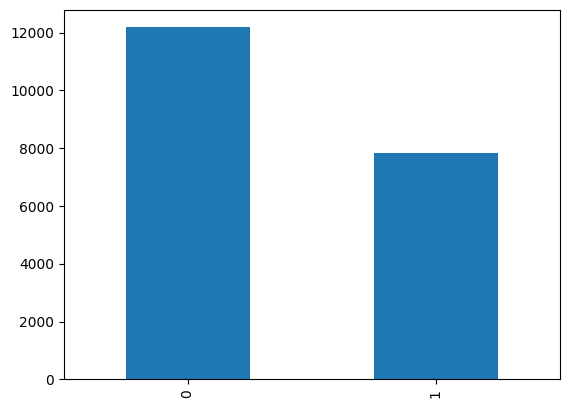

In [16]:
df['annotation'].value_counts().sort_index().plot.bar()

In [17]:
#Biasness
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  60.89195540222989 %
Cybertrolling:  39.10804459777012 %


In [18]:
df.columns

Index(['content', 'annotation'], dtype='object')

# Preprocessing

In [19]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,She dirty come crook Rengel Dems fucking corru...
2,1,fuck up I could day too Lets hour Ping later s...
3,1,Dude dont finish enclosing fucking showers I h...
4,1,WTF talking Men No men thats menage thats gay
...,...,...
19996,0,I dont But complaining going do
19997,0,Bahah yeah im totally gonna get pissed talking...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,Whats something unique Ohio


In [20]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,annotation,content_tokenize
0,1,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay
...,...,...
19996,0,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio


In [21]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,1,get fuck real dude,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...
19996,0,i dont but complain go do,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio,what someth uniqu ohio


In [22]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [23]:
print(tfIdf)

  (0, 3598)	0.5682792040556577
  (0, 10534)	0.6408032598619846
  (0, 4665)	0.3314842764826402
  (0, 4896)	0.3956616014132561
  (1, 7497)	0.1421522208901913
  (1, 7670)	0.18997382467613527
  (1, 10707)	0.3380770158779807
  (1, 7868)	0.17712641457020445
  (1, 6881)	0.2707206754001475
  (1, 2649)	0.3478358132370042
  (1, 3127)	0.36956626902789813
  (1, 10686)	0.36956626902789813
  (1, 2791)	0.3609013757539863
  (1, 2453)	0.20014266836955738
  (1, 3306)	0.294004579420996
  (1, 11402)	0.24231137330135857
  (1, 4665)	0.12302268120056382
  (2, 5648)	0.26264752682375
  (2, 1476)	0.2858475342270202
  (2, 14420)	0.28761927584628644
  (2, 11156)	0.4130661580674724
  (2, 7317)	0.3061308801267633
  (2, 9784)	0.38298243181872793
  (2, 5956)	0.28144866948736874
  (2, 7434)	0.24199503289435126
  :	:
  (19997, 8527)	0.362558005670761
  (19997, 14527)	0.1829917686470462
  (19997, 364)	0.2524980709313037
  (19997, 8632)	0.19487099515279527
  (19997, 5039)	0.21529577669215724
  (19997, 14639)	0.1516281744

In [24]:
print(tfIdf.shape) # means total rows  20001 with 14783 features

(20001, 14783)


In [25]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"]) #for second entry only(just to check if working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(10))

         TF-IDF
sched  0.413066
ping   0.382982
later  0.306131
write  0.287619
book   0.285848
hour   0.281449
here   0.262648
let    0.241995
up     0.237401
could  0.223151


In [26]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.get_feature_names_out())
print(dfx)

        aa  aaaaaaaaaa  aaaaaanndgummi  aaaagh  aaaawwwww  aaand  \
0      0.0         0.0             0.0     0.0        0.0    0.0   
1      0.0         0.0             0.0     0.0        0.0    0.0   
2      0.0         0.0             0.0     0.0        0.0    0.0   
3      0.0         0.0             0.0     0.0        0.0    0.0   
4      0.0         0.0             0.0     0.0        0.0    0.0   
...    ...         ...             ...     ...        ...    ...   
19996  0.0         0.0             0.0     0.0        0.0    0.0   
19997  0.0         0.0             0.0     0.0        0.0    0.0   
19998  0.0         0.0             0.0     0.0        0.0    0.0   
19999  0.0         0.0             0.0     0.0        0.0    0.0   
20000  0.0         0.0             0.0     0.0        0.0    0.0   

       aaanyyywhoooooooo  aaargh  aaarrrg  aah  ...  zon  zone  zoo  zoom  \
0                    0.0     0.0      0.0  0.0  ...  0.0   0.0  0.0   0.0   
1                    0.0     

In [27]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [28]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 533.8157298036014
fuck                                               Score: 503.76150769255435
damn                                               Score: 482.3875012051478
suck                                               Score: 407.37790877127185
ass                                                Score: 337.54089621427744
that                                               Score: 311.6250930420745
lol                                                Score: 298.0085779872157
im                                                 Score: 296.0216055277791
like                                               Score: 287.8183474868775
you                                                Score: 284.7850587424088
it                                                 Score: 254.75722294501585
get                                                Score: 253.19747902607998
what                                               Score: 221.43673623523864
know  

In [29]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X, y = make_classification(n_classes=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 20)
(80,)
(20, 20)
(20,)


In [30]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[ 0  1]
 [41 39]]


In [31]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[ 0  1]
 [ 9 11]]


In [32]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [33]:
print(X_over.shape)
print(y_over.shape)

(82, 20)
(82,)


In [34]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[ 0  1]
 [41 41]]


# Training and Calculating Scores

In [35]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  disp = plot_precision_recall_curve(model, X_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  return plt.show()


## Normal Methods

In [36]:
unique_classes = np.unique(y_train)
print(unique_classes)


[0 1]


In [37]:
#Supervised Methods
# 3 normal methods
# 2 ensemble methods
gnb = GaussianNB()
gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict(X_test)
print ("Score:", gnbmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Score: 0.85
Confusion Matrix: 
 [[9 0]
 [3 8]]


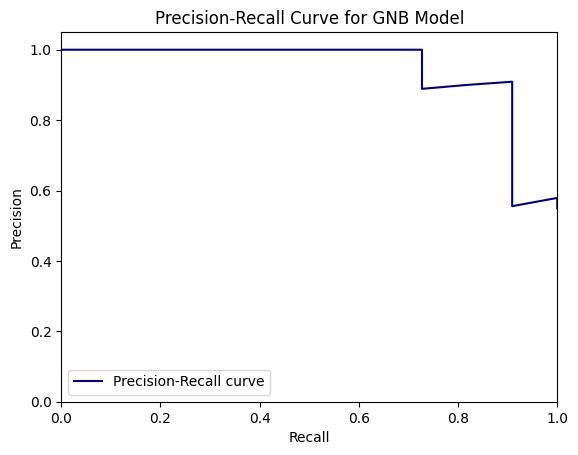

In [38]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for GNB Model')
plt.legend(loc="lower left")
plt.show()



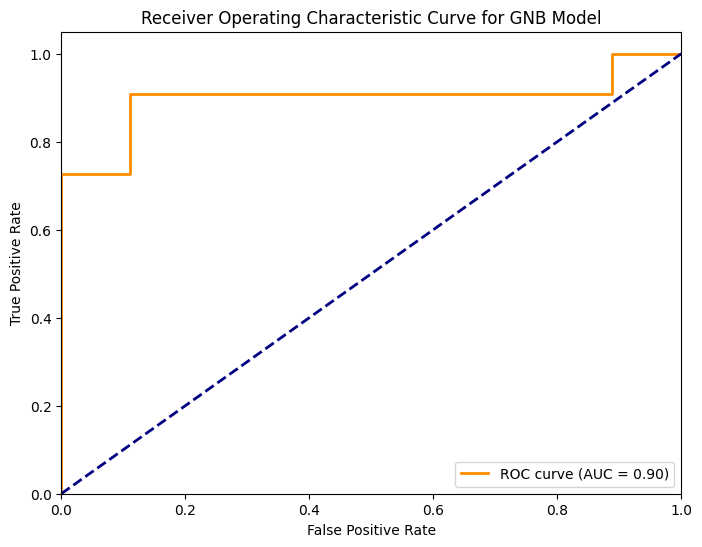

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for GNB Model')
plt.legend(loc="lower right")
plt.show()


In [40]:
lgr = LogisticRegression()
lgr.fit(X_over, y_over)
y_pred = lgr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.9
Confusion Matrix: 
 [[9 0]
 [2 9]]


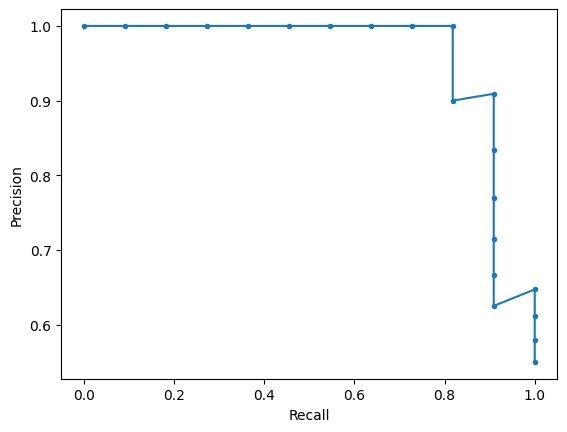

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# assuming you have already defined y_test and lgr (the trained logistic regression model)
y_score = lgr.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

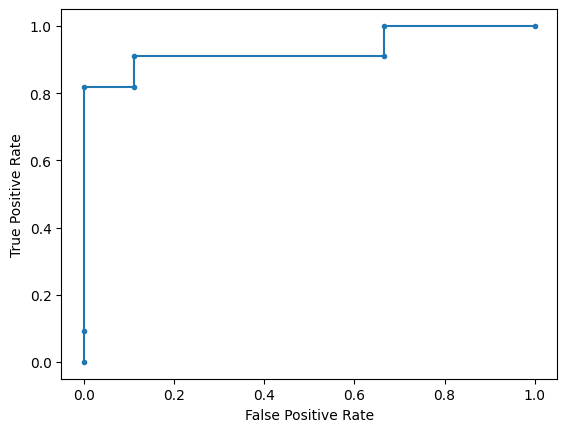

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# assuming you have already defined y_test and y_score (the predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(X_over, y_over)
y_pred = dtc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.9
Confusion Matrix: 
 [[9 0]
 [2 9]]


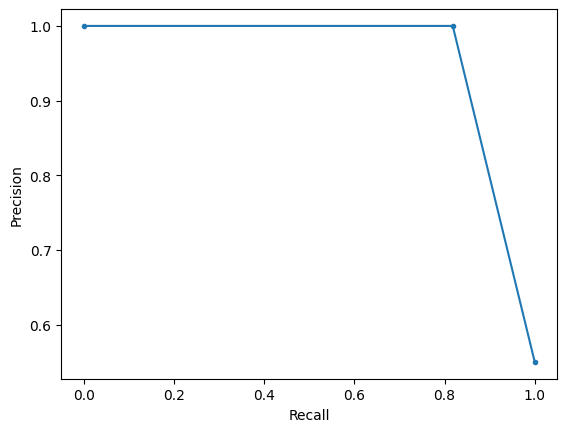

In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# assuming you have already defined dtc, X_test, and y_test
y_score = dtc.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

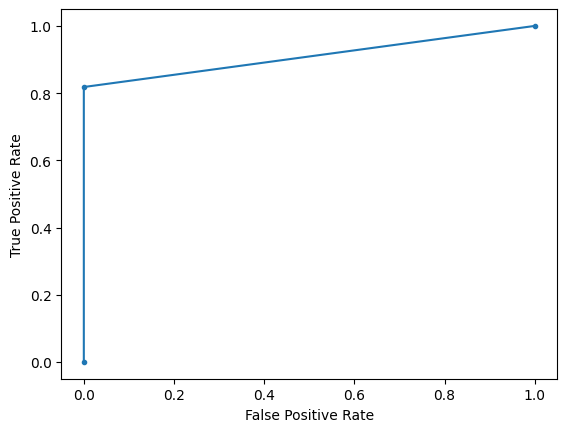

In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# assuming you have already defined dtc, X_test, and y_test
y_score = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Ensemble Methods

In [46]:
#Ensemble methods from here 
abc = AdaBoostClassifier() 
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.95
Confusion Matrix: 
 [[ 9  0]
 [ 1 10]]


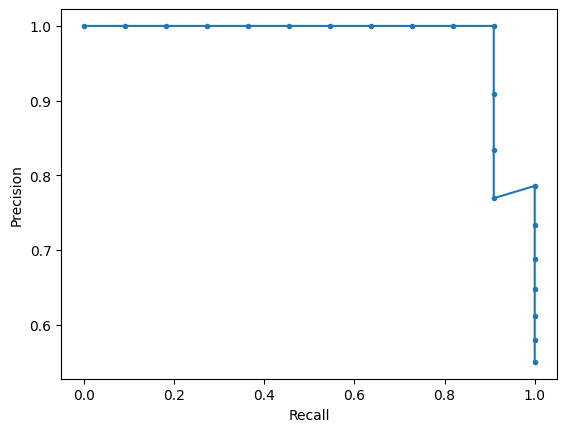

In [47]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# assuming you have already defined abc, X_test, and y_test
y_score = abc.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

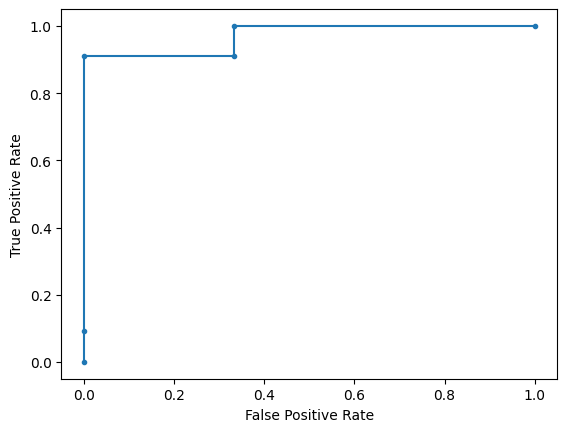

In [48]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# assuming you have already defined abc, X_test, and y_test
y_score = abc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [49]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Score: 0.9
Confusion Matrix: 
 [[9 0]
 [2 9]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


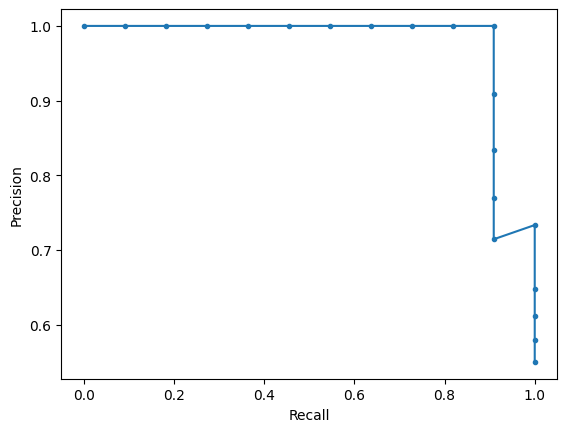

In [50]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# assuming you have already defined rfcmodel, X_test, and y_test
y_score = rfcmodel.predict_proba(X_test)[:, 1] # probability of positive class
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


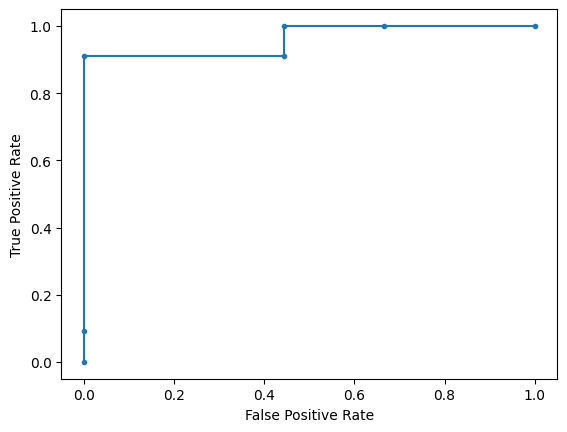

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# assuming you have already defined rfcmodel, X_test, and y_test
y_score = rfcmodel.predict_proba(X_test)[:, 1] # probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [56]:
'''import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Load the dataset and split into input and output arrays
df = pd.read_json('C:/Users/suren/OneDrive/Desktop/Cyberbullying Detection Project/Cyberbullying-Detection-using-Machine-Learning-main/Dataset.json')
x = np.array(df["content"])
y = np.array(df["annotation"])

# Preprocess the data by removing stopwords and performing stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
x_preprocessed = []
for doc in x:
    doc = re.sub(r'\W', ' ', doc)  # remove special characters
    doc = doc.lower()  # convert to lowercase
    words = doc.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    words = [stemmer.stem(w) for w in words]  # perform stemming
    doc = ' '.join(words)
    x_preprocessed.append(doc)
x = np.array(x_preprocessed)

# Convert text data to numerical representation using CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x)

# Convert the label data to string or integer format
y = np.array([str(yi) if type(yi) == dict else int(yi) for yi in y])

# Encode the label data to numeric format if it is not already in one
if not np.issubdtype(y.dtype, np.number) and len(set(y)) > 2:
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train an AdaBoost classifier on the training data
#clf = AdaBoostClassifier()
clf = RandomForestClassifier()
clf.fit(x.toarray(), y)
#clf.fit(X_train.toarray(), y_train)'''


RandomForestClassifier()

In [58]:
'''# Predict the class label of a new test sample
test_data = "##@you are a pain in the ass"
df_test = cv.transform([test_data]).toarray()
predicted_label = clf.predict(df_test)
print(predicted_label[0][25])
# Check the predicted label and print the result
if float(predicted_label[0][25]) == 1:
    print("Bullying detected")
else:
    print("Non-Bullying")'''

1
Bullying detected
